# Imports

In [1]:
import msk_modelling_python as msk
msk.bops.greet()
import matplotlib.pyplot as plt

joint_forces = msk.bops.read.mot(r"C:\Git\research_data\Projects\runbops_FAIS_phd\simulations\009\pre\sprint_1\joint_reaction_loads.sto")

print(joint_forces.columns[joint_forces.columns.str.contains("hip")].to_list())

Are you ready to run openSim?!
['hip_r_on_pelvis_in_pelvis_fx', 'hip_r_on_pelvis_in_pelvis_fy', 'hip_r_on_pelvis_in_pelvis_fz', 'hip_r_on_pelvis_in_pelvis_mx', 'hip_r_on_pelvis_in_pelvis_my', 'hip_r_on_pelvis_in_pelvis_mz', 'hip_r_on_pelvis_in_pelvis_px', 'hip_r_on_pelvis_in_pelvis_py', 'hip_r_on_pelvis_in_pelvis_pz', 'hip_l_on_pelvis_in_pelvis_fx', 'hip_l_on_pelvis_in_pelvis_fy', 'hip_l_on_pelvis_in_pelvis_fz', 'hip_l_on_pelvis_in_pelvis_mx', 'hip_l_on_pelvis_in_pelvis_my', 'hip_l_on_pelvis_in_pelvis_mz', 'hip_l_on_pelvis_in_pelvis_px', 'hip_l_on_pelvis_in_pelvis_py', 'hip_l_on_pelvis_in_pelvis_pz']


# Analysis single trial

Integral of the total force: 4349.651171125793 N.s
Impulse during 10 000 steps:  43496511.71125793 N.s
Impulse during 1 step:  4349.651171125793 N.s
Integral of the squat force: 24464.788545331077 N.s
Impulse during squat:  24464.788545331077 N.s
Impulse during 10 squats:  244647.88545331077 N.s
Impulse during 10 x 8hour workdays:  1957183.0836264861 N.s


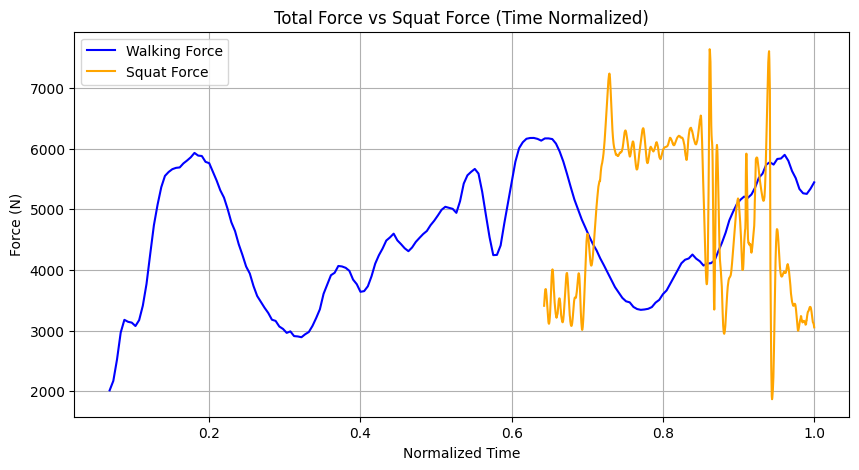

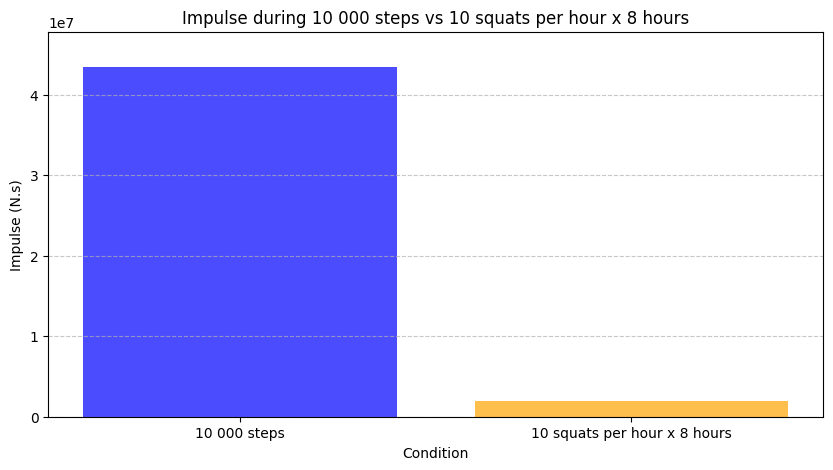

In [8]:
filename = r"C:\Users\Bas\Desktop\squat_vs_steps\walking\_StaticOptimization_force.sto"
forces = msk.bops.read.mot(filename)
forces['total'] = forces.sum(axis=1)

forces_squat = msk.bops.read.mot(r"C:\Users\Bas\Desktop\squat_vs_steps\squat\_StaticOptimization_force.sto")
forces_squat['total'] = forces_squat.sum(axis=1)

# time normalization


# plot the forces
# Time normalization
forces['time_normalized'] = forces['time'] / forces['time'].max()
forces_squat['time_normalized'] = forces_squat['time'] / forces_squat['time'].max()

# Plot the forces with time normalization
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(forces['time_normalized'], forces['total'], label='Walking Force', color='blue')
plt.plot(forces_squat['time_normalized'], forces_squat['total'], label='Squat Force', color='orange')
plt.title("Total Force vs Squat Force (Time Normalized)")
plt.legend()
plt.xlabel("Normalized Time")
plt.ylabel("Force (N)")
plt.grid(True)


# calculate and print the integral of the force over time
integral = forces['total'].sum() * (forces['time'][1] - forces['time'][0])
print(f"Integral of the total force: {integral} N.s")

print('Impulse during 10 000 steps: ', integral * 10_000, 'N.s')
print('Impulse during 1 step: ', integral, 'N.s')

# calculate and print the integral of the squat force over time
integral_squat = forces_squat['total'].sum() * (forces_squat['time'][1] - forces_squat['time'][0])
print(f"Integral of the squat force: {integral_squat} N.s")
print('Impulse during squat: ', integral_squat, 'N.s')
print('Impulse during 10 squats: ', integral_squat * 10, 'N.s')
print('Impulse during 10 x 8hour workdays: ', integral_squat * 10 * 8, 'N.s')

plt.show()

# Create a bar plot for impulse comparison
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar([0, 1], [integral * 10_000, integral_squat * 10 * 8], color=['blue', 'orange'], alpha=0.7)
plt.title("Impulse during 10 000 steps vs 10 squats per hour x 8 hours")
plt.xlabel("Condition")
plt.ylabel("Impulse (N.s)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks([0, 1], ['10 000 steps', '10 squats per hour x 8 hours'])
plt.ylim(0, max(integral * 10_000, integral_squat * 10 * 8) * 1.1)
plt.show()



In [2]:
analog_csv_path = msk.bops.export_analog()

In [3]:
grf_csv = msk.bops.pd.read_csv(analog_csv_path)

# delete all columns not containing Force_Fx1	Force_Fy1	Force_Fz1	Moment_Mx1	Moment_My1	Moment_Mz1	Force_Fx2	Force_Fy2	Force_Fz2	Moment_Mx2	Moment_My2	Moment_Mz2	Force_Fx3	Force_Fy3	Force_Fz3	Moment_Mx3	Moment_My3	Moment_Mz3	Force_Fx4	Force_Fy4	Force_Fz4	Moment_Mx4	Moment_My4	Moment_Mz4
grf_csv = grf_csv.loc[:, grf_csv.columns.str.contains("Force_Fx|Force_Fy|Force_Fz|Moment_Mx|Moment_My|Moment_Mz")]

# Rename the columns to match the .mot file format
grf_csv.columns = grf_csv.columns.str.replace("Force_Fx", "force_fx")
grf_csv.columns = grf_csv.columns.str.replace("Force_Fy", "force_fy")
grf_csv.columns = grf_csv.columns.str.replace("Force_Fz", "force_fz")

grf_csv.columns = grf_csv.columns.str.replace("Moment_Mx", "moment_mx")
grf_csv.columns = grf_csv.columns.str.replace("Moment_My", "moment_my")
grf_csv.columns = grf_csv.columns.str.replace("Moment_Mz", "moment_mz")



# Open the .mot file for writing
mot_file_path = analog_csv_path.replace('.csv', '.mot')
with open(mot_file_path, 'w') as mot_file:
    # Write the header lines
    mot_file.write("grf\n")
    mot_file.write("version=1\n")
    mot_file.write(f"nRows={len(grf_csv)}\n")
    mot_file.write(f"nColumns={len(grf_csv.columns)}\n")
    mot_file.write("inDegrees=yes\n")
    mot_file.write("endheader\n")
    mot_file.write("time\t" + "\t".join(grf_csv.columns) + "\n")  # Write the column names
    
    # Write the data line by line
    for _, row in grf_csv.iterrows():
        line = '\t'.join(map(str, row.values))  # Convert each row to a tab-separated string
        mot_file.write(line + '\n')


# Define functions

In [ ]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vedo

SETTINGS_FILE = 'febio.json' # Or use the name you prefer, e.g., 'settings.json'

# ==============================================================================
# Function Definitions
# ==============================================================================

def load_json_settings(settings_filepath):
    """
    Loads settings from a JSON file, constructs absolute file paths.

    Args:
        settings_filepath (str): The path to the JSON settings file.

    Returns:
        tuple: Contains:
            - settings (dict): The loaded settings dictionary.
            - reaction_load_file (str): Absolute path to reaction loads file.
            - femur_stl_file (str): Absolute path to femur STL file.
            - pelvis_stl_file (str): Absolute path to pelvis STL file.
            - femoral_cartilage_stl_file (str or None): Absolute path to cartilage STL or None.
            - kinematics_file (str): Absolute path to kinematics file.
            - cols (dict): Dictionary of column names.
            - vis_settings (dict): Dictionary of visualization settings.
    """
    print(f"Loading settings from: {settings_filepath}")
    if not os.path.exists(settings_filepath):
        raise FileNotFoundError(f"Error: Settings file '{settings_filepath}' not found.")

    with open(settings_filepath, 'r') as f:
        settings = json.load(f)

    paths_config = settings['file_paths']
    cols = settings['data_columns']
    vis_settings = settings['visualization']

    main_dir = paths_config.get('main')
    if not main_dir or not os.path.isdir(main_dir):
        raise ValueError(f"Error: 'main' path '{main_dir}' specified in {settings_filepath} is not a valid directory.")

    print(f"Using main directory: {main_dir}")

    # Construct full paths
    reaction_load_file = os.path.join(main_dir, paths_config['joint_reaction_loads'])
    femur_stl_file = os.path.join(main_dir, paths_config['femur_stl'])
    pelvis_stl_file = os.path.join(main_dir, paths_config['pelvis_stl'])
    kinematics_file = os.path.join(main_dir, paths_config['kinematics'])

    # Handle optional cartilage path
    femoral_cartilage_stl_file = None
    if paths_config.get('femoral_cartilage_stl'):
         # Check if the filename string itself is not empty or null
        if paths_config['femoral_cartilage_stl']:
            femoral_cartilage_stl_file = os.path.join(main_dir, paths_config['femoral_cartilage_stl'])
        else:
             print("Femoral cartilage filename is empty in settings, skipping.")

    print("Settings loaded and paths constructed.")
    return settings, reaction_load_file, femur_stl_file, pelvis_stl_file, femoral_cartilage_stl_file, kinematics_file, cols, vis_settings

def load_reaction_sto_file(filepath):
    """
    Loads an OpenSim .sto file (like joint reaction loads) into a pandas DataFrame.
    Uses pandas.read_csv, handling OpenSim headers.

    Args:
        filepath (str): The absolute path to the .sto file.

    Returns:
        pandas.DataFrame: DataFrame containing the data from the file.
    """
    print(f"\nLoading data from: {filepath}")
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"Error: Data file not found at {filepath}")

    # Find the line number where the header ends
    header_end_line = 0
    try:
        with open(filepath, 'r') as f:
            for i, line in enumerate(f):
                if line.strip().lower() == 'endheader':
                    header_end_line = i
                    break
            else:
                raise ValueError(f"Error: 'endheader' not found in {filepath}")

        # Read the data table
        data = pd.read_csv(filepath, sep='\t', skiprows=header_end_line + 1)
        print(f"Successfully loaded: {os.path.basename(filepath)}")
        # print(f"Columns found: {data.columns.tolist()}") # Optional: print columns
        return data
    except Exception as e:
        print(f"Error reading data table in {filepath}. Trying alternative read method...")
        # Attempt alternative if standard read fails (e.g., header line issues)
        try:
             with open(filepath, 'r') as f:
                lines = f.readlines()
                # Ensure header_end_line is valid and there are lines after it
                if header_end_line < len(lines) -1 :
                    column_names_line = lines[header_end_line + 1].strip()
                    column_names = column_names_line.split('\t')

                    data = pd.read_csv(filepath, sep='\t', skiprows=header_end_line + 2, header=None)

                    # Check if number of columns matches
                    if len(column_names) == data.shape[1]:
                         data.columns = column_names
                         print(f"Successfully loaded (alternative method): {os.path.basename(filepath)}")
                         # print(f"Columns assigned: {data.columns.tolist()}") # Optional: print columns
                         return data
                    else:
                         raise ValueError(f"Column name count ({len(column_names)}) does not match data column count ({data.shape[1]}) in alternative read.")
                else:
                    raise ValueError("File structure issue: Not enough lines after 'endheader'.")

        except Exception as e2:
            raise ValueError(f"Could not parse data table in {filepath} using standard or alternative methods. Error: {e2}")

def validate_data_columns(data_df, required_cols):
    """
    Validates if the required time and force columns exist in the DataFrame.

    Args:
        data_df (pandas.DataFrame): The DataFrame loaded from the .sto file.
        required_cols (dict): Dictionary containing keys 'time', 'force_fx', 'force_fy', 'force_fz'
                                with expected column names.

    Returns:
        bool: True if all required columns are present, False otherwise.
    """
    time_col = required_cols['time']
    force_fx_col = required_cols['force_fx']
    force_fy_col = required_cols['force_fy']
    force_fz_col = required_cols['force_fz']

    missing_cols = []
    if time_col not in data_df.columns:
        missing_cols.append(time_col)
    if force_fx_col not in data_df.columns:
        missing_cols.append(force_fx_col)
    if force_fy_col not in data_df.columns:
        missing_cols.append(force_fy_col)
    if force_fz_col not in data_df.columns:
        missing_cols.append(force_fz_col)

    if not missing_cols:
        print("\nRequired force and time columns successfully identified.")
        return True
    else:
        print("\n--- Error: Missing Required Columns ---")
        print(f"The following required columns were not found in the loaded data:")
        for col in missing_cols:
            print(f"  - '{col}' (Expected based on settings)")
        print(f"\nAvailable columns in the file: {data_df.columns.tolist()}")
        print("Please check the 'data_columns' section in your settings file and the header of the .sto file.")
        return False

def calculate_force_magnitude(data_df, cols):
    """
    Calculates the resultant force magnitude from fx, fy, fz components.

    Args:
        data_df (pandas.DataFrame): DataFrame containing the force data.
        cols (dict): Dictionary with keys 'time', 'force_fx', 'force_fy', 'force_fz'.

    Returns:
        tuple: Contains:
            - time_vector (pd.Series): The time data series.
            - magnitude (pd.Series): The calculated force magnitude series.
            - fx (pd.Series): Force component x.
            - fy (pd.Series): Force component y.
            - fz (pd.Series): Force component z.
    """
    print("Calculating force magnitude...")
    fx = data_df[cols['force_fx']]
    fy = data_df[cols['force_fy']]
    fz = data_df[cols['force_fz']]
    magnitude = np.sqrt(fx**2 + fy**2 + fz**2)
    time_vector = data_df[cols['time']]
    print("Magnitude calculation complete.")
    return time_vector, magnitude, fx, fy, fz

def plot_magnitude_over_time(time_vector, magnitude, time_col_name):
    """
    Generates and displays a 2D plot of force magnitude vs. time.

    Args:
        time_vector (pd.Series): The time data.
        magnitude (pd.Series): The force magnitude data.
        time_col_name (str): The name of the time column for axis labeling.
    """
    print("Plotting force magnitude vs. time...")
    plt.figure(figsize=(10, 5))
    plt.plot(time_vector, magnitude)
    plt.xlabel(f"Time ({time_col_name})")
    plt.ylabel("Resultant Hip Force Magnitude (N)")
    plt.title("Hip Joint Resultant Force Magnitude Over Time")
    plt.grid(True)
    plt.tight_layout()
    plt.show() # Shows the 2D plot - script pauses here until closed

def load_stl_meshes(femur_path, pelvis_path, cartilage_path=None):
    """
    Loads STL mesh files using vedo.

    Args:
        femur_path (str): Path to the femur STL file.
        pelvis_path (str): Path to the pelvis STL file.
        cartilage_path (str, optional): Path to the femoral cartilage STL file. Defaults to None.

    Returns:
        tuple: Contains:
            - meshes_to_plot (list): List of vedo mesh objects to be plotted.
            - femur (vedo.Mesh): The loaded femur mesh object.
            - pelvis (vedo.Mesh): The loaded pelvis mesh object.
    """
    print("\nLoading STL meshes...")
    meshes_to_plot = []
    try:
        if not os.path.exists(femur_path): raise FileNotFoundError(f"Femur STL not found: {femur_path}")
        femur = vedo.load(femur_path).color("ivory").alpha(0.8)
        meshes_to_plot.append(femur)
        print(f"Loaded: {os.path.basename(femur_path)}")

        if not os.path.exists(pelvis_path): raise FileNotFoundError(f"Pelvis STL not found: {pelvis_path}")
        pelvis = vedo.load(pelvis_path).color("sandybrown").alpha(0.8)
        meshes_to_plot.append(pelvis)
        print(f"Loaded: {os.path.basename(pelvis_path)}")

        # Optionally load cartilage
        if cartilage_path:
            if os.path.exists(cartilage_path):
                fem_cart = vedo.load(cartilage_path).color("lightblue").alpha(0.6)
                meshes_to_plot.append(fem_cart)
                print(f"Loaded: {os.path.basename(cartilage_path)}")
            else:
                 print(f"Warning: Specified femoral cartilage STL not found at {cartilage_path}, skipping.")
        else:
            print("Femoral cartilage STL path not provided or empty, skipping.")

        print("STL loading complete.")
        return meshes_to_plot, femur, pelvis

    except Exception as e:
        print(f"Error loading STL files: {e}")
        raise # Re-raise the exception to stop execution

def visualize_3d_force_vector(meshes_to_plot, vis_mesh_ref, vis_settings, time_vector, magnitude, fx, fy, fz):
    """
    Creates and shows the 3D visualization with meshes and the force vector.

    Args:
        meshes_to_plot (list): List of vedo mesh objects to display.
        vis_mesh_ref (vedo.Mesh): A reference mesh (e.g., pelvis) used for scaling and centering calculations.
        vis_settings (dict): Visualization settings dictionary.
        time_vector (pd.Series): Time data.
        magnitude (pd.Series): Force magnitude data.
        fx (pd.Series): Force x-component data.
        fy (pd.Series): Force y-component data.
        fz (pd.Series): Force z-component data.
    """
    print("\nPreparing 3D visualization...")

    # Determine the time point index
    plot_idx_setting = vis_settings.get('plot_timepoint_index', 'peak_force')
    plot_idx = 0 # Default index
    if isinstance(plot_idx_setting, int):
        plot_idx = plot_idx_setting
        if not (0 <= plot_idx < len(magnitude)):
            print(f"Warning: Specified plot_timepoint_index {plot_idx} is out of bounds (max: {len(magnitude)-1}). Using index 0.")
            plot_idx = 0
        print(f"Plotting vector at specified index: {plot_idx}, Time: {time_vector.iloc[plot_idx]:.3f}")
    elif isinstance(plot_idx_setting, str) and plot_idx_setting.lower() == 'peak_force':
        if len(magnitude) > 0:
             plot_idx = np.argmax(magnitude)
             print(f"Plotting vector at peak force magnitude (Index: {plot_idx}, Time: {time_vector.iloc[plot_idx]:.3f})")
        else:
             print("Warning: No force data available to find peak force. Using index 0.")
             plot_idx = 0
    else:
        print(f"Warning: Invalid plot_timepoint_index '{plot_idx_setting}'. Using index 0.")
        plot_idx = 0

     # Ensure plot_idx is valid if magnitude is empty
    if len(magnitude) == 0 and plot_idx != 0:
        print("Warning: Force data is empty. Resetting plot index to 0.")
        plot_idx = 0
    elif plot_idx >= len(magnitude):
         print(f"Warning: Calculated plot index {plot_idx} is out of bounds for magnitude data (length {len(magnitude)}). Clamping to last index.")
         plot_idx = len(magnitude) - 1 if len(magnitude) > 0 else 0


    # Get force vector components at the chosen time point
    if len(magnitude) > 0:
        force_vector_at_point = np.array([
            fx.iloc[plot_idx],
            fy.iloc[plot_idx],
            fz.iloc[plot_idx]
        ])
        current_magnitude = magnitude.iloc[plot_idx]
        current_time = time_vector.iloc[plot_idx]
        current_fx = fx.iloc[plot_idx]
        current_fy = fy.iloc[plot_idx]
        current_fz = fz.iloc[plot_idx]

    else:
        force_vector_at_point = np.array([0.0, 0.0, 0.0])
        current_magnitude = 0.0
        current_time = 0.0
        current_fx = 0.0
        current_fy = 0.0
        current_fz = 0.0
        print("Warning: No force data points exist. Vector will be zero.")


    # Determine the origin for the force vector arrow
    mesh_center = vis_mesh_ref.centerOfMass()
    origin_offset = np.array(vis_settings.get('vector_origin_offset_pelvis', [0, 0, 0]))
    vector_origin = mesh_center + origin_offset

    # Create the force vector arrow
    max_dim = np.max(vis_mesh_ref.bounds()[1::2] - vis_mesh_ref.bounds()[0::2]) if np.any(vis_mesh_ref.bounds()) else 1.0
    norm_force = np.linalg.norm(force_vector_at_point)
    vector_scale_factor = vis_settings.get('vector_scale_factor', 0.1)

    if norm_force > 1e-9: # Avoid division by zero
        scaled_vector = force_vector_at_point * vector_scale_factor * max_dim / norm_force
    else:
        scaled_vector = np.array([0.0, 0.0, 0.0])
        if norm_force > 1e-12: # Only warn if not exactly zero
             print("Warning: Force magnitude is near zero at selected timepoint. Arrow will have zero length.")

    # Define arrow appearance (adjust shaft radius relative to max dimension)
    shaft_radius = max_dim * 0.005
    force_arrow = vedo.Arrow(startPoint=vector_origin, endPoint=vector_origin + scaled_vector, c='red', s=shaft_radius)

    # Add a label
    label_text = f"Force @ Time {current_time:.2f}s\nMag: {current_magnitude:.1f} N\nVec: ({current_fx:.1f}, {current_fy:.1f}, {current_fz:.1f})"
    label_size = max_dim * 0.015 # Scale label size
    force_label = vedo.Text3D(label_text, pos=vector_origin + scaled_vector * 1.1, s=label_size, c='black')

    # Show Plot
    print(f"Showing 3D visualization with force vector at index {plot_idx}...")
    print(f" - Scaled Vector (for vis): {scaled_vector}")
    print(f" - Actual Force Vector: ({current_fx:.1f}, {current_fy:.1f}, {current_fz:.1f}) N")
    print(f" - Vector Origin (approx ref mesh center + offset): {vector_origin}")

    vp = vedo.Plotter(title="Hip Joint Geometry and Reaction Force Vector", axes=1)
    vp.show(meshes_to_plot + [force_arrow, force_label], __doc__, viewup='z') # Added viewup



# Main Execution (apply HJCF to femur stls)

## Load Settings and Construct Paths

In [ ]:
(settings, reaction_load_file, femur_stl_file, pelvis_stl_file,
    femoral_cartilage_stl_file, kinematics_file, cols, vis_settings) = load_json_settings(SETTINGS_FILE)


# Load Reaction Data
reaction_data = load_reaction_sto_file(reaction_load_file)


# Validate Columns
if not validate_data_columns(reaction_data, cols):
    exit() # Stop if columns are missing

## Calculate Force Magnitude

In [ ]:
time_vector, magnitude, fx, fy, fz = calculate_force_magnitude(reaction_data, cols)


## Plot Magnitude vs Time (2D)

In [ ]:
plot_magnitude_over_time(time_vector, magnitude, cols['time'])


## Load STL Meshes

In [ ]:
meshes_to_plot, femur_mesh, pelvis_mesh = load_stl_meshes(
    femur_stl_file, pelvis_stl_file, femoral_cartilage_stl_file
)


## Visualize 3D Force Vector

In [ ]:
#    (Using pelvis_mesh as the reference for scaling/centering the vector origin)
visualize_3d_force_vector(
    meshes_to_plot, pelvis_mesh, vis_settings,
    time_vector, magnitude, fx, fy, fz
)

print("\nAnalysis complete.")
